In [1]:
import pandas as pd
import numpy as np
import math
# from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from pandas.plotting import lag_plot

# sns.set()

random_state = 123456

%matplotlib inline

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# df = pd.read_csv('2019.csv', index_col='date', dtype={'price': np.int32}, parse_dates=True)
# df.set_index(pd.date_range(min(df.index), periods=df.size, freq='D'), inplace=True, verify_integrity=True)

In [3]:
df = pd.read_csv('fuel-prices/all_features_combined.csv', index_col='date', dtype={'price': np.int32, 
                 'tapis_oil_price': np.int32, 'national_avg_price': np.int32}, parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.shape[0], freq='D'), inplace=True, verify_integrity=True)

In [21]:
df[df.index >= '2019-01-01']

price  tapis_oil_price_t_minus_10  national_avg_price  \
2019-01-01   1374                        5352                1121   
2019-01-02   1407                        5352                1120   
2019-01-03   1392                        5352                1121   
2019-01-04   1412                        5352                1122   
2019-01-05   1418                        5352                1129   
...           ...                         ...                 ...   
2019-12-27   1608                        7084                1336   
2019-12-28   1589                        7103                1349   
2019-12-29   1579                        7159                1349   
2019-12-30   1602                        7198                1349   
2019-12-31   1609                        7177                1357   

            sgd_exchange_rate_t_minus_6  usd_exchange_rate  volume_in_ml  \
2019-01-01                       0.9696             0.7053          27.3   
2019-01-02                       0.9644             0.6985          27.3   
2019-01-03                       0.9625             0.7006          27.3   
2019-01-04                       0.9611             0.7113          27.3   
2019-01-05                       0.9611             0.7148          27.3   
...                                 ...                ...           ...   
2019-12-27                       0.9386             0.6978          14.3   
2019-12-28                       0.9386             0.6995          14.3   
2019-12-29                       0.9386             0.6995          14.3   
2019-12-30                       0.9382             0.6995          14.3   
2019-12-31                       0.9377             0.7022          14.3   

            wholesale_price_t_minus_4  wholesale_cluster_label  \
2019-01-01                       1132                        1   
2019-01-02                       1120                        1   
2019-01-03                       1120                        1   
2019-01-04                       1120                        1   
2019-01-05                       1121                        1   
...                               ...                      ...   
2019-12-27                       1332                        0   
2019-12-28                       1332                        0   
2019-12-29                       1335                        0   
2019-12-30                       1336                        0   
2019-12-31                       1338                        0   

            tapis_oil_cluster_label  price_t_plus_1  
2019-01-01                        1            1407  
2019-01-02                        1            1392  
2019-01-03                        1            1412  
2019-01-04                        1            1418  
2019-01-05                        1            1402  
...                             ...             ...  
2019-12-27                        0            1589  
2019-12-28                        0            1579  
2019-12-29                        0            1602  
2019-12-30                        0            1609  
2019-12-31                        0            1609  

[365 rows x 10 columns]

### 1. Average method

In [5]:
df.price.mean()

1566.7470319634704

### 2. Naïve method

In [6]:
df[-1:]

price  tapis_oil_price_t_minus_10  national_avg_price  \
2019-12-31   1609                        7177                1357   

            sgd_exchange_rate_t_minus_6  usd_exchange_rate  volume_in_ml  \
2019-12-31                       0.9377             0.7022          14.3   

            wholesale_price_t_minus_4  wholesale_cluster_label  \
2019-12-31                       1338                        0   

            tapis_oil_cluster_label  price_t_plus_1  
2019-12-31                        0            1609

### 3. Seasonal naïve method

In [7]:
df[-23:].head(1)

price  tapis_oil_price_t_minus_10  national_avg_price  \
2019-12-09   1723                        6939                1347   

            sgd_exchange_rate_t_minus_6  usd_exchange_rate  volume_in_ml  \
2019-12-09                        0.934             0.6823          14.3   

            wholesale_price_t_minus_4  wholesale_cluster_label  \
2019-12-09                       1354                        2   

            tapis_oil_cluster_label  price_t_plus_1  
2019-12-09                        0            1806

### 4. Drift method

In [12]:
x = range(df.shape[0])
# x
slope, intercept = np.polyfit(x, df.price, deg=1)
y_hat = slope * x + intercept

In [14]:
yplus1 = slope * (df.shape[0] + 1) + intercept
yplus1

1695.5164372350089

In [17]:
np.mean([1696, 1723, 1609, 1567])

1648.75

In [20]:
np.mean([1.1 * 1696, 0.9 * 1723, 1.1 * 1609, 0.9 * 1567])

1649.1250000000002

In [22]:
xx = [6,5,11,7,5]
yy = [2,3,9,1,8]
a_slope, a_intercept = np.polyfit(xx, yy, deg=1)
a_slope

0.6693548387096773

In [23]:
a_intercept

0.04838709677419366

### 5. Transformations

In [9]:
# transformer = preprocessing.QuantileTransformer(random_state=random_state)
transformer = preprocessing.PowerTransformer(method='box-cox', standardize=True)
plt.figure(figsize=(16, 6))
# plt.plot(df.index, preprocessing.scale(df.price))
# plt.plot(df.index, preprocessing.normalize(df.price.values.reshape(-1,1), norm='l1'))
# plt.plot(df.index, preprocessing.MinMaxScaler().fit_transform(df.price.values.reshape(-1,1)))
price_transformed = transformer.fit_transform(df.price.values.reshape(-1,1))
plt.plot(df.index, price_transformed)
plt.show()
# df.price.apply(lambda x: math.sqrt(x)).plot(figsize=(16,6))
# preprocessing.normalize(df.price, norm='l1')
# df
# df.price.values.reshape(-1,1)

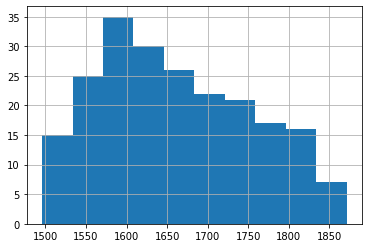

In [10]:
df.price.hist()

In [11]:
plt.hist(price_transformed)
plt.show()

In [12]:
df['price_shifted'] = df.price.shift(-1)
df.price_shifted.fillna(method='ffill', inplace=True)
df.price_shifted = df.price_shifted.astype('int32')
# df.price.tshift()
df['residual'] = df.apply(lambda se: se.price - se.price_shifted, axis=1)
df

price  price_shifted  residual
2019-06-01   1716           1659        57
2019-06-02   1659           1639        20
2019-06-03   1639           1632         7
2019-06-04   1632           1623         9
2019-06-05   1623           1600        23
...           ...            ...       ...
2019-12-27   1601           1598         3
2019-12-28   1598           1572        26
2019-12-29   1572           1543        29
2019-12-30   1543           1524        19
2019-12-31   1524           1524         0

[214 rows x 3 columns]

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df.price)
plt.plot(df.index, y_hat, "r--", lw=1)
plt.show()

In [14]:
df.residual.plot(figsize=(16,6))

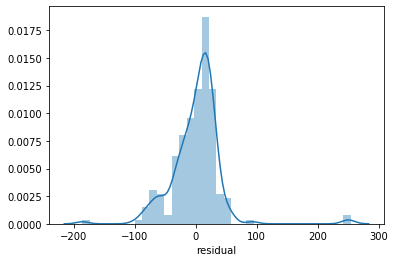

In [15]:
# df.residual.hist()
_ = sns.distplot(df.residual)

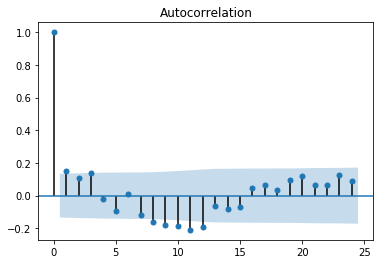

In [16]:
sm.graphics.tsa.plot_acf(df.residual)
plt.show()

In [17]:
# for lag in range(2):
#     lag_plot(df.residual, lag=lag + 1)
#     plt.show()
df.describe()

price  price_shifted    residual
count   214.000000     214.000000  214.000000
mean   1661.182243    1660.285047    0.897196
std      94.297349      94.685930   41.381639
min    1496.000000    1496.000000 -186.000000
25%    1586.500000    1586.000000  -17.000000
50%    1648.000000    1648.000000    7.000000
75%    1729.500000    1729.500000   20.000000
max    1871.000000    1871.000000  254.000000

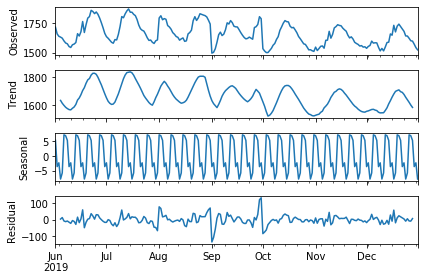

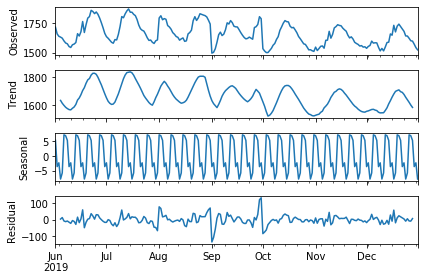

In [19]:
decom_result = sm.tsa.seasonal_decompose(df.price)
decom_result.plot()